In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
def computePageRank(DB_articles_authors):

    print('Strating PageRank computation...\n')


    #estraggo tutti i pub_key introdotti nella piattaforma
    #saranno tutti in From perche:
        #se citi genesis => sei in from, il to è genesis tx
        #se citi articoli => sei in from, il to è l'articolo citato
    From_pub_keys = DB_articles_authors.From_Author_Pub_Key.values


    #NB: prendo solo le pub_keys degli autori in From, perche per costruire il grafo
    # aggiungo archi (e non nodi). Quindi aggiungere tutti gli archi =>
    # aggiungere tutti i nodi contenuti nel grafo

    
    #rimuovo i duplicati e lascio solo pub_keys distinti
    unique_pub_keys = np.unique(From_pub_keys)

    print(f'#UNIQUE PUB KEYS: {len(unique_pub_keys)}')

    #creo grafo vuoto
    D=nx.DiGraph() 

    for i in unique_pub_keys:
        D.add_node(str(i),nodeId = str(i))
    

    #per ogni autore citante
    for citing_pub_key_author in unique_pub_keys:  
        
        #raccolgo sue citazioni nel DB
        outgoing_citation_from_pub_key = DB_articles_authors[DB_articles_authors['From_Author_Pub_Key']==citing_pub_key_author]

        #non considero le citazioni fatte dalla frontiera verso la genesis tx
        outgoing_citation_from_pub_key = outgoing_citation_from_pub_key[outgoing_citation_from_pub_key['To_Author_Pub_key']!= 'Not_available']


        #print('OCFS')
        #print(outgoing_citation_from_pub_key)


        if(len(outgoing_citation_from_pub_key)>0):

            #invidiuo il num di cit fatte verso ogni altro autore
            outgoing_citation_from_pub_key = np.unique(outgoing_citation_from_pub_key.To_Author_Pub_key.values,return_counts=True)

            #print('OCFS2')
            #print(outgoing_citation_from_pub_key)

            #inserisco nel grafo l'arco (autore_citante, autore_citato, num citazioni)
            for i in range(len(outgoing_citation_from_pub_key[0])):

                cited_pub_key_author = outgoing_citation_from_pub_key[0][i] #[0] contiene i diversi valori
                
                num_citations = outgoing_citation_from_pub_key[1][i] #[1] le occorrenze di tali valori
                
                #non considero le auto citazioni per il calcolo del page rank
                if(citing_pub_key_author!=cited_pub_key_author):
                    D.add_weighted_edges_from([(str(citing_pub_key_author),str(cited_pub_key_author),num_citations)])

    

    #calcolo PageRank
    PR = nx.pagerank(D)
    PR_df = pd.DataFrame.from_dict(PR,orient='index') 
    
    print('PR computed') 

    return PR_df

In [14]:
DB_AA_originale_clique = pd.read_csv('DB_articles_authors_built_originale_clique.csv')
genesis_tx_node_id = DB_AA_originale_clique[DB_AA_originale_clique['To_Author_Pub_key']=='Not_available']['ToNodeId'].values[0]

#RIMUOVO LE CITAZIONI INIZIALI FATTE VERSO LA GENESIS TX DAGLI ARTICOLI DI FRONTIERA
DB_AA_originale_clique = DB_AA_originale_clique[DB_AA_originale_clique['ToNodeId']!= genesis_tx_node_id]

DB_AA_originale_clique.reset_index(drop = True, inplace = True)

In [15]:
DB_AA_originale_clique

,FromNodeId,From_Author_Pub_Key,ToNodeId,To_Author_Pub_key
0,00aaa0b40708a33f8a6f591a66c0a965ef674921479d7c...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,ac4e501976f9769b6881c3a20b7a451a3c695ccd0bfd10...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
1,443d4a4dd5fe9564c268c73f07a2bda15271d478b25658...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,ad56dd9827389bcca27fd735535be7af5a58148b612200...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
2,5e3a86a58f7a8da9074bdec496065487ffbc08428b8122...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,b8600a268bacecd2dae16cb229f29ed78cae55de87bd1d...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
3,8d105b6fa0df90b33d44eec18f3a4c0d817d0da3695fe4...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,5f1088d2a32c8c4ccc2268369a5bfb802798433f608182...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
4,54ca89ecc3d09b9917d7e75d0df6d47429adf02bdb0106...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,9a8b8650b7741097e387a7b1f7b9714dabc3b8e8792b1e...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
...,...,...,...,...
1933,ba5c9e06255ef2f6efcbad29a1c535b739e4832b11b6b1...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,397b5a905fa3451d67a11b2c4b48627a3d270f1302b2c1...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
1934,ba5c9e06255ef2f6efcbad29a1c535b739e4832b11b6b1...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,4e2130c68e955927fe7eb54c637201af0a02ebb0355386...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
1935,ba5c9e06255ef2f6efcbad29a1c535b739e4832b11b6b1...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,5f563b1419e377bc2437b44c79cf80242be50cd8dd2160...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...
1936,ba5c9e06255ef2f6efcbad29a1c535b739e4832b11b6b1...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,9d2da8bc77e449cfb5170c0f034863f550e79dc600c96e...,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...


In [16]:
PR_df_original_clique = computePageRank(DB_AA_originale_clique)

Strating PageRank computation...

#UNIQUE PUB KEYS: 700
PR computed


In [17]:
PR_df_original_clique.sort_values(by=0,inplace = True, ascending=False)
PR_df_original_clique.reset_index(drop = False, inplace = True)
PR_df_original_clique.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

PR_df_original_clique

,Author,PR_values
0,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.042414
1,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.015953
2,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.014931
3,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.014887
4,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.014411
...,...,...
873,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.000483
874,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.000483
875,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.000483
876,-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...,0.000483


In [18]:
PR_df_original_clique.iloc[25]['Author']

'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsb0xPj9dHwhItbhQvHCG\niH0OQvBo/kZcB7cegz+w9PY928mPNvC089KUrv66ib14UZliBxpS1KvoSFmLrhLJ\nOqOFPlaNDIBjfw0xmPAcRgjZJ+FLT02ZITvcPzMDyB2rSW9CycYAjFJhMZwcqnRH\n4lG+RtvKR9V/qfQBiFXTRWlqHjw+bF93l4MRFfDm3AHRXHtIDKR46qFtCNzlesyQ\nh+czQCLeFNtbKwgl194SuOEz5rHeFC8t2MezFzwrOE1PibpbwdDU5Rp6jE0+AgsR\nAx1TPKHwwqlXO0ZfVVOO0hL5DZSPSXp6J0q4clqE3rE7RmWt1totPfgHx2rizzHy\nswIDAQAB\n-----END PUBLIC KEY-----\n'

In [19]:
#SEED DI AUTORE CON PR MASSIMO: 
pub_key_max_pr = PR_df_original_clique.iloc[0]['Author']
pub_key_max_pr

'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA0IWIpXNeD7Mrkc9Oinqp\nnoSSKvpqu7yK4pVwj7mWytASNijW1hXAug3hICjFqXfebf1yEpBE0D2F4E+fdKTo\nywI0E8Uj45SYhdZ++Kuc3Lq0NwEDuuiNUSJ7VlP+rrTW9CF4sjcvt+yRCADmPBi9\nU/cpz5s7NqHICnxYxU1ADc0Rtmb/coTjTIcsbq0HUd9k9QTXYkIeCgGkUuVWbqk5\nslLGJIoB470DYOsBHB7rk9i36wucqXvCofRM6pEj4AKElPCUxSealwtCqlrrqVaf\nAmKVh8H0QPRiWyMENnN3XZ6qoWXuCVQstlY5E0ejzyDCNJIwJFHsc6gxvyH03azU\n6QIDAQAB\n-----END PUBLIC KEY-----\n'

Ora ho DB_AA_originale_clique e PR_df_original come df di partenza.

In [38]:
# N = 3
DB_cricca = DB_AA_originale_clique.copy()

#aggiungo Spammed
index_to_add_row = len(DB_cricca)

DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = 'S'
DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = PR_df_original_clique.iloc[25]['Author']

authors = ['a','b','c']
    
for i in range(len(authors)):
    for j in range(len(authors)):
        if(i!=j):
            
            index_to_add_row = len(DB_cricca)

            #add the given info
            DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
            DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
            DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
            DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = authors[j]
        
citazioni_rimaste = 60 - (len(authors)*(len(authors)-1))


i = 0
while(citazioni_rimaste > 0):
    
    index_to_add_row = len(DB_cricca)

    #add the given info
    DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
    DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
    DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
    DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = 'S'
    
    
    citazioni_rimaste = citazioni_rimaste-1
    i = i+1
    
    if(i == 3):
        i = 0

    

    
PR_df_Cricca = computePageRank(DB_cricca)
PR_df_Cricca.sort_values(by=0,inplace = True, ascending=False)
PR_df_Cricca.reset_index(drop = False, inplace = True)
PR_df_Cricca.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

print(PR_df_Cricca)

pr_highest = PR_df_Cricca[PR_df_Cricca['Author']==pub_key_max_pr]['PR_values'].values
rank_highest = PR_df_Cricca[PR_df_Cricca["Author"] == pub_key_max_pr].index[0]

pr_spammed = PR_df_Cricca[PR_df_Cricca['Author']=='S']['PR_values'].values
rank_spammed = PR_df_Cricca[PR_df_Cricca["Author"] == 'S'].index[0]

print(f'PR HIGHEST: {pr_highest}')
print(f'RANK HIGHEST: {rank_highest} ')

print(f'PR SPAMMED: {pr_spammed}')
print(f'RANK SPAMMED: {rank_spammed} ')

Strating PageRank computation...

#UNIQUE PUB KEYS: 704
PR computed
                                                Author  PR_values
0    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.042214
1    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.015878
2    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014861
3    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014817
4    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014343
..                                                 ...        ...
877  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000481
878  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000481
879  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000481
880  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000481
881  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000481

[882 rows x 2 columns]
PR HIGHEST: [0.04221448]
RANK HIGHEST: 0 
PR SPAMMED: [0.00168816]
RANK SPAMMED: 104 


In [40]:
N = 4
DB_cricca = DB_AA_originale_clique.copy()

#aggiungo Spammed
index_to_add_row = len(DB_cricca)

DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = 'S'
DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = PR_df_original_clique.iloc[25]['Author']

authors = ['a','b','c','d']
    
for i in range(len(authors)):
    for j in range(len(authors)):
        if(i!=j):
            
            index_to_add_row = len(DB_cricca)

            #add the given info
            DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
            DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
            DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
            DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = authors[j]
        
citazioni_rimaste = 60 - (len(authors)*(len(authors)-1))


i = 0
while(citazioni_rimaste > 0):
    
    index_to_add_row = len(DB_cricca)

    #add the given info
    DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
    DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
    DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
    DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = 'S'
    
    
    citazioni_rimaste = citazioni_rimaste-1
    i = i+1
    
    if(i == N):
        i = 0

    

    
PR_df_Cricca = computePageRank(DB_cricca)
PR_df_Cricca.sort_values(by=0,inplace = True, ascending=False)
PR_df_Cricca.reset_index(drop = False, inplace = True)
PR_df_Cricca.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

print(PR_df_Cricca)

pr_highest = PR_df_Cricca[PR_df_Cricca['Author']==pub_key_max_pr]['PR_values'].values
rank_highest = PR_df_Cricca[PR_df_Cricca["Author"] == pub_key_max_pr].index[0]

pr_spammed = PR_df_Cricca[PR_df_Cricca['Author']=='S']['PR_values'].values
rank_spammed = PR_df_Cricca[PR_df_Cricca["Author"] == 'S'].index[0]

print(f'PR HIGHEST: {pr_highest}')
print(f'RANK HIGHEST: {rank_highest} ')

print(f'PR SPAMMED: {pr_spammed}')
print(f'RANK SPAMMED: {rank_spammed} ')

Strating PageRank computation...

#UNIQUE PUB KEYS: 705
PR computed
                                                Author  PR_values
0    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.042154
1    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.015855
2    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014840
3    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014796
4    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014323
..                                                 ...        ...
878  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
879  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
880  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
881  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
882  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480

[883 rows x 2 columns]
PR HIGHEST: [0.04215431]
RANK HIGHEST: 0 
PR SPAMMED: [0.00205512]
RANK SPAMMED: 74 


In [41]:
N = 5
DB_cricca = DB_AA_originale_clique.copy()

#aggiungo Spammed
index_to_add_row = len(DB_cricca)

DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = 'S'
DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = PR_df_original_clique.iloc[25]['Author']

authors = ['a','b','c','d','e']
    
for i in range(len(authors)):
    for j in range(len(authors)):
        if(i!=j):
            
            index_to_add_row = len(DB_cricca)

            #add the given info
            DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
            DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
            DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
            DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = authors[j]
        
citazioni_rimaste = 60 - (len(authors)*(len(authors)-1))


i = 0
while(citazioni_rimaste > 0):
    
    index_to_add_row = len(DB_cricca)

    #add the given info
    DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
    DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
    DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
    DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = 'S'
    
    
    citazioni_rimaste = citazioni_rimaste-1
    i = i+1
    
    if(i == N):
        i = 0

    

    
PR_df_Cricca = computePageRank(DB_cricca)
PR_df_Cricca.sort_values(by=0,inplace = True, ascending=False)
PR_df_Cricca.reset_index(drop = False, inplace = True)
PR_df_Cricca.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

print(PR_df_Cricca)

pr_highest = PR_df_Cricca[PR_df_Cricca['Author']==pub_key_max_pr]['PR_values'].values
rank_highest = PR_df_Cricca[PR_df_Cricca["Author"] == pub_key_max_pr].index[0]

pr_spammed = PR_df_Cricca[PR_df_Cricca['Author']=='S']['PR_values'].values
rank_spammed = PR_df_Cricca[PR_df_Cricca["Author"] == 'S'].index[0]

print(f'PR HIGHEST: {pr_highest}')
print(f'RANK HIGHEST: {rank_highest} ')

print(f'PR SPAMMED: {pr_spammed}')
print(f'RANK SPAMMED: {rank_spammed} ')

Strating PageRank computation...

#UNIQUE PUB KEYS: 706
PR computed
                                                Author  PR_values
0    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.042085
1    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.015829
2    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014815
3    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014772
4    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014300
..                                                 ...        ...
879  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
880  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
881  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
882  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480
883  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000480

[884 rows x 2 columns]
PR HIGHEST: [0.0420853]
RANK HIGHEST: 0 
PR SPAMMED: [0.00237605]
RANK SPAMMED: 58 


In [42]:
N = 6
DB_cricca = DB_AA_originale_clique.copy()

#aggiungo Spammed
index_to_add_row = len(DB_cricca)

DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = 'S'
DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = PR_df_original_clique.iloc[25]['Author']

authors = ['a','b','c','d','e','f']
    
for i in range(len(authors)):
    for j in range(len(authors)):
        if(i!=j):
            
            index_to_add_row = len(DB_cricca)

            #add the given info
            DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
            DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
            DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
            DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = authors[j]
        
citazioni_rimaste = 60 - (len(authors)*(len(authors)-1))


i = 0
while(citazioni_rimaste > 0):
    
    index_to_add_row = len(DB_cricca)

    #add the given info
    DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
    DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
    DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
    DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = 'S'
    
    
    citazioni_rimaste = citazioni_rimaste-1
    i = i+1
    
    if(i == N):
        i = 0

    

    
PR_df_Cricca = computePageRank(DB_cricca)
PR_df_Cricca.sort_values(by=0,inplace = True, ascending=False)
PR_df_Cricca.reset_index(drop = False, inplace = True)
PR_df_Cricca.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

print(PR_df_Cricca)

pr_highest = PR_df_Cricca[PR_df_Cricca['Author']==pub_key_max_pr]['PR_values'].values
rank_highest = PR_df_Cricca[PR_df_Cricca["Author"] == pub_key_max_pr].index[0]

pr_spammed = PR_df_Cricca[PR_df_Cricca['Author']=='S']['PR_values'].values
rank_spammed = PR_df_Cricca[PR_df_Cricca["Author"] == 'S'].index[0]

print(f'PR HIGHEST: {pr_highest}')
print(f'RANK HIGHEST: {rank_highest} ')

print(f'PR SPAMMED: {pr_spammed}')
print(f'RANK SPAMMED: {rank_spammed} ')

Strating PageRank computation...

#UNIQUE PUB KEYS: 707
PR computed
                                                Author  PR_values
0    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.041998
1    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.015796
2    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014784
3    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014741
4    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014270
..                                                 ...        ...
880  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000479
881  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000479
882  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000479
883  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000479
884  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000479

[885 rows x 2 columns]
PR HIGHEST: [0.04199765]
RANK HIGHEST: 0 
PR SPAMMED: [0.00260134]
RANK SPAMMED: 52 


In [43]:
N = 7
DB_cricca = DB_AA_originale_clique.copy()

#aggiungo Spammed
index_to_add_row = len(DB_cricca)

DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = 'S'
DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = PR_df_original_clique.iloc[25]['Author']

authors = ['a','b','c','d','e','f','g']
    
for i in range(len(authors)):
    for j in range(len(authors)):
        if(i!=j):
            
            index_to_add_row = len(DB_cricca)

            #add the given info
            DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
            DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
            DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
            DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = authors[j]
        
citazioni_rimaste = 60 - (len(authors)*(len(authors)-1))


i = 0
while(citazioni_rimaste > 0):
    
    index_to_add_row = len(DB_cricca)

    #add the given info
    DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
    DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
    DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
    DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = 'S'
    
    
    citazioni_rimaste = citazioni_rimaste-1
    i = i+1
    
    if(i == N):
        i = 0

    

    
PR_df_Cricca = computePageRank(DB_cricca)
PR_df_Cricca.sort_values(by=0,inplace = True, ascending=False)
PR_df_Cricca.reset_index(drop = False, inplace = True)
PR_df_Cricca.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

print(PR_df_Cricca)

pr_highest = PR_df_Cricca[PR_df_Cricca['Author']==pub_key_max_pr]['PR_values'].values
rank_highest = PR_df_Cricca[PR_df_Cricca["Author"] == pub_key_max_pr].index[0]

pr_spammed = PR_df_Cricca[PR_df_Cricca['Author']=='S']['PR_values'].values
rank_spammed = PR_df_Cricca[PR_df_Cricca["Author"] == 'S'].index[0]

print(f'PR HIGHEST: {pr_highest}')
print(f'RANK HIGHEST: {rank_highest} ')

print(f'PR SPAMMED: {pr_spammed}')
print(f'RANK SPAMMED: {rank_spammed} ')

Strating PageRank computation...

#UNIQUE PUB KEYS: 708
PR computed
                                                Author  PR_values
0    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.041864
1    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.015746
2    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014737
3    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014694
4    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014224
..                                                 ...        ...
881  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000477
882  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000477
883  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000477
884  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000477
885  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000477

[886 rows x 2 columns]
PR HIGHEST: [0.04186433]
RANK HIGHEST: 0 
PR SPAMMED: [0.00256741]
RANK SPAMMED: 52 


In [44]:
N = 8
DB_cricca = DB_AA_originale_clique.copy()

#aggiungo Spammed
index_to_add_row = len(DB_cricca)

DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = 'S'
DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = PR_df_original_clique.iloc[25]['Author']

authors = ['a','b','c','d','e','f','g','h']
    
for i in range(len(authors)):
    for j in range(len(authors)):
        if(i!=j):
            
            index_to_add_row = len(DB_cricca)

            #add the given info
            DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
            DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
            DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
            DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = authors[j]
        
citazioni_rimaste = 60 - (len(authors)*(len(authors)-1))


i = 0
while(citazioni_rimaste > 0):
    
    index_to_add_row = len(DB_cricca)

    #add the given info
    DB_cricca.loc[index_to_add_row,'FromNodeId'] = 'NodeId_s' #aggiungo valori
    DB_cricca.loc[index_to_add_row,'From_Author_Pub_Key'] = authors[i]
    DB_cricca.loc[index_to_add_row,'ToNodeId'] = 'NodeId_d'
    DB_cricca.loc[index_to_add_row,'To_Author_Pub_key'] = 'S'
    
    
    citazioni_rimaste = citazioni_rimaste-1
    i = i+1
    
    if(i == N):
        i = 0

    

    
PR_df_Cricca = computePageRank(DB_cricca)
PR_df_Cricca.sort_values(by=0,inplace = True, ascending=False)
PR_df_Cricca.reset_index(drop = False, inplace = True)
PR_df_Cricca.rename(columns={'index':'Author', 0:'PR_values'}, inplace = True)

print(PR_df_Cricca)

pr_highest = PR_df_Cricca[PR_df_Cricca['Author']==pub_key_max_pr]['PR_values'].values
rank_highest = PR_df_Cricca[PR_df_Cricca["Author"] == pub_key_max_pr].index[0]

pr_spammed = PR_df_Cricca[PR_df_Cricca['Author']=='S']['PR_values'].values
rank_spammed = PR_df_Cricca[PR_df_Cricca["Author"] == 'S'].index[0]

print(f'PR HIGHEST: {pr_highest}')
print(f'RANK HIGHEST: {rank_highest} ')

print(f'PR SPAMMED: {pr_spammed}')
print(f'RANK SPAMMED: {rank_spammed} ')

Strating PageRank computation...

#UNIQUE PUB KEYS: 709
PR computed
                                                Author  PR_values
0    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.041588
1    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.015642
2    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014649
3    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014596
4    -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.014136
..                                                 ...        ...
882  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000473
883  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000473
884  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000473
885  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000473
886  -----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w...   0.000473

[887 rows x 2 columns]
PR HIGHEST: [0.04158822]
RANK HIGHEST: 0 
PR SPAMMED: [0.00139703]
RANK SPAMMED: 145 


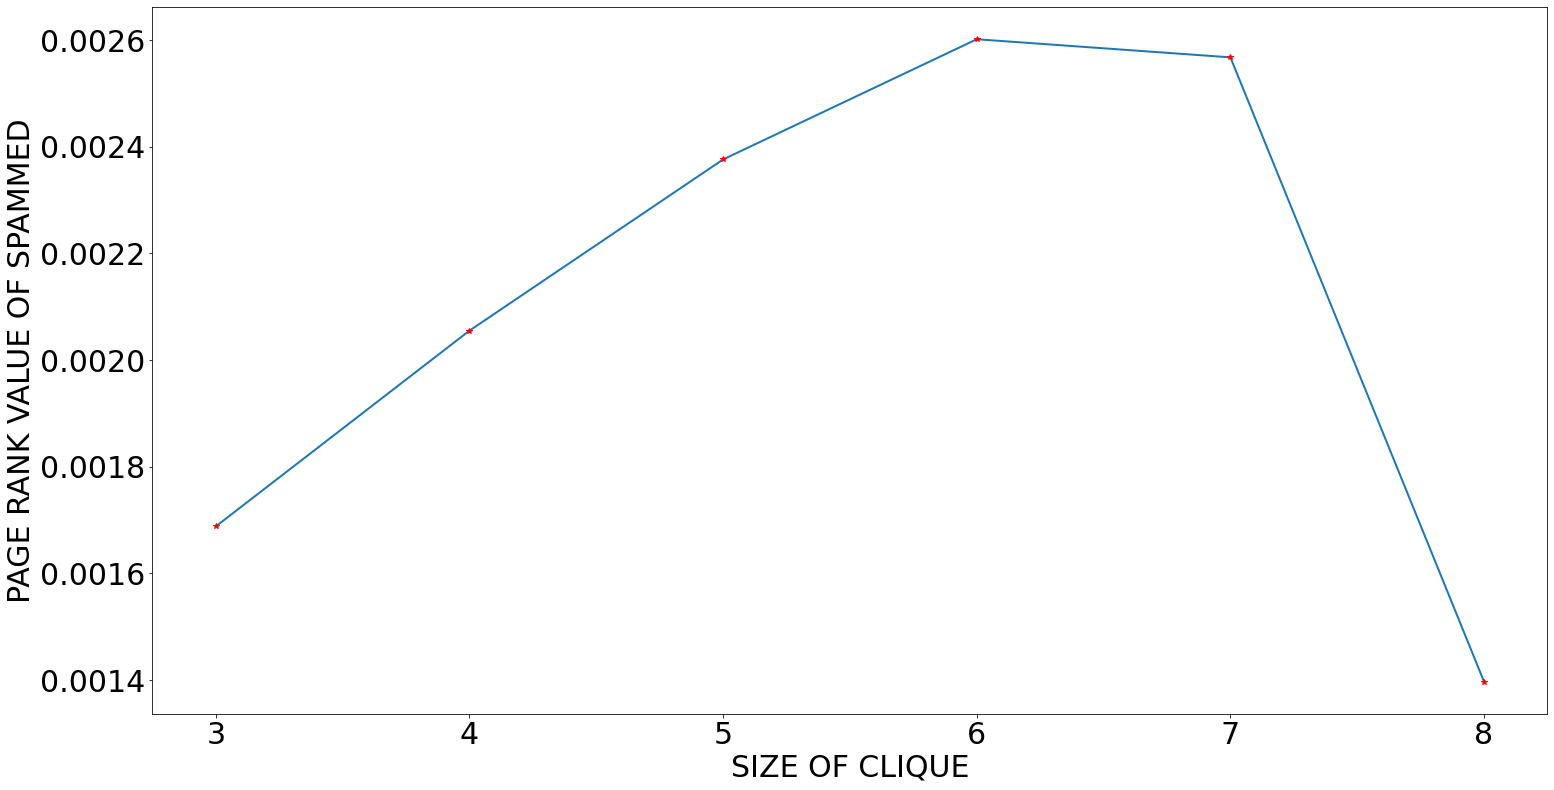

In [55]:
import pylab as plt

fig,ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(13)

x = [3,4,5,6,7,8]

y = [0.00168816, 0.00205512, 0.00237605, 0.00260134, 0.00256741, 0.00139703 ]

plt.xlabel('SIZE OF CLIQUE',fontsize=30)
plt.ylabel('PAGE RANK VALUE OF SPAMMED',fontsize=30)

#plt.yticks(y,fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(x,fontsize=30)

plt.plot(x,y, linewidth='2')
plt.plot(x,y, '*', c = 'red')

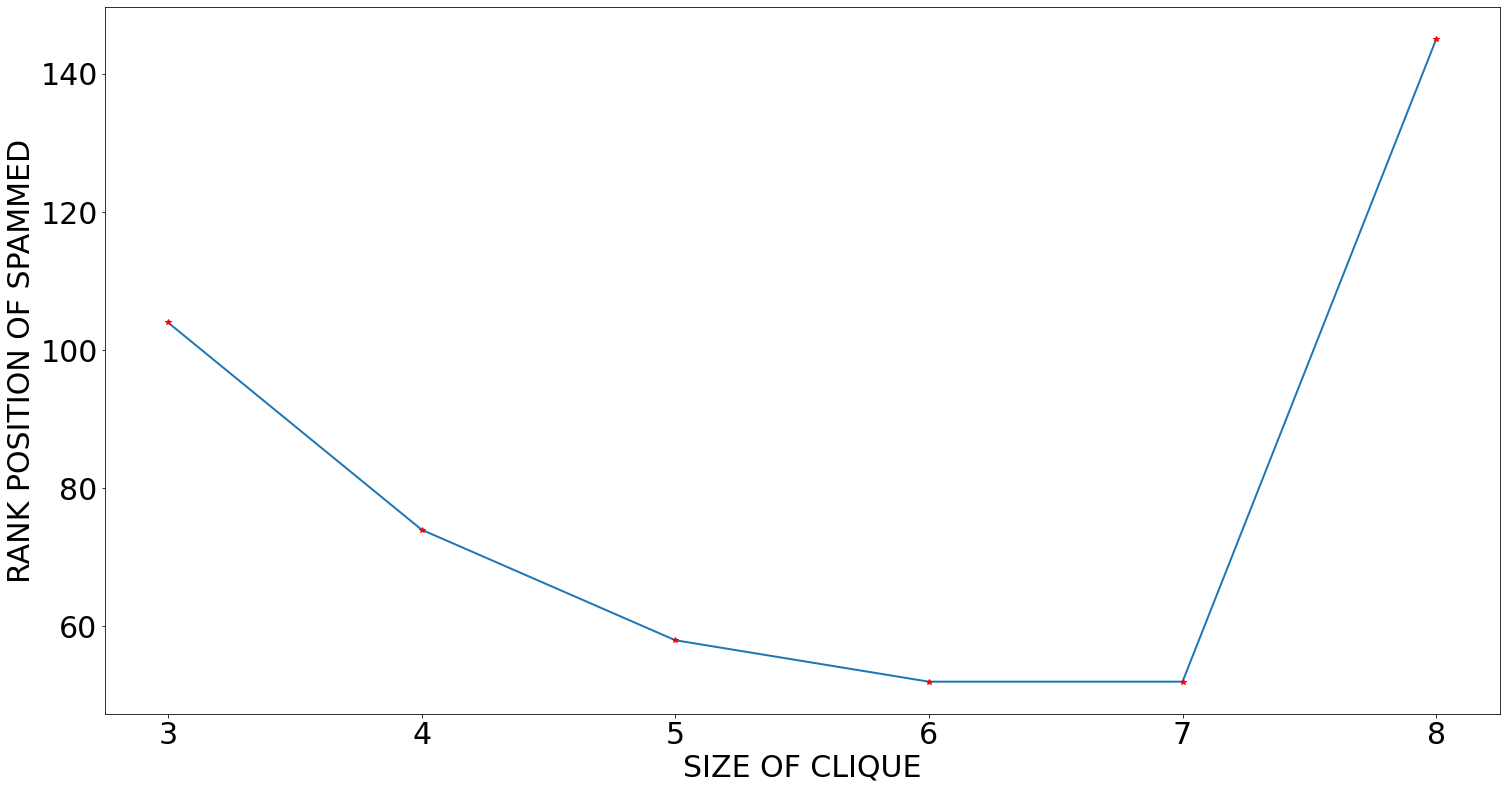

In [56]:
fig,ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(13)

x = [3,4,5,6,7,8]

y = [104, 74, 58, 52, 52, 145 ]

plt.xlabel('SIZE OF CLIQUE',fontsize=30)
plt.ylabel('RANK POSITION OF SPAMMED',fontsize=30)

#plt.yticks(y,fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(x,fontsize=30)

plt.plot(x,y, linewidth='2')
plt.plot(x,y, '*', c = 'red')